In [17]:
import torch
import torchvision
from torchvision import transforms
from torchvision.transforms import functional as F
from torchvision.models.detection import maskrcnn_resnet50_fpn
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


In [26]:
# load model of masked RCNN
model = maskrcnn_resnet50_fpn(pretrained=True)
model.eval()

model.eval()

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth


100%|██████████| 170M/170M [00:01<00:00, 175MB/s]


MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(in

In [27]:
def load_image(image_path):
  img = Image.open(image_path)
  transform = transforms.Compose([
    transforms.ToTensor()
  ])
  return transform(img).unsqueeze(0) # Add batch dimensions


In [28]:
# function for prediction

def predict(image):
  image_tensor = load_image(image)
  with torch.no_grad():
    prediction = model(image_tensor)

  return prediction

In [29]:
# general categories on which prediction is possible, starts index 1 onwards

COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter',
    'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra',
    'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis',
    'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard',
    'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon',
    'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet',
    'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
    'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier',
    'toothbrush'
]

In [30]:
predictions = predict('jungle.jpg')

In [31]:
predictions

[{'boxes': tensor([[416.1658, 213.5272, 618.6298, 294.9222],
          [ 47.0028, 234.2588, 162.7326, 395.3300],
          [ 89.9395, 231.5175, 211.4969, 347.4781],
          [254.5588, 236.8033, 341.3957, 270.9430]]),
  'labels': tensor([25, 24, 24, 24]),
  'scores': tensor([0.9989, 0.9989, 0.9979, 0.9962]),
  'masks': tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.]]],
  
  
          [[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            ...,
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.]]],
  
  
          [[[0., 0., 0.,  ..., 0., 0., 0.],
            [0., 0., 0.,  ..., 0., 0., 0.],
            [0

In [32]:
masks = predictions[0]['masks']
len(masks)

4

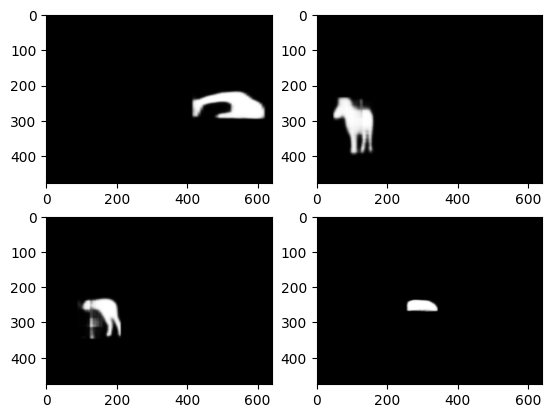

In [34]:
for i in range(len(masks)):
  plt.subplot(2,2,i+1)
  plt.imshow(masks[i].reshape(476,640), cmap='gray')

In [53]:
def visualize_predictions(image, predictions):
  image = plt.imread(image)
  plt.figure(figsize=(10, 10))
  plt.imshow(image)

  boxes = predictions[0]['boxes'].cpu().numpy()   # direct tensor format may work
  labels = predictions[0]['labels'].cpu().numpy()
  scores = predictions[0]['scores'].cpu().numpy()
  masks = predictions[0]['masks'].cpu().numpy()

  # mask
  keep = scores > 0.5
  boxes = boxes[keep]
  labels = labels[keep]
  scores = scores[keep]
  masks = masks[keep]

  for box, mask, label, score in zip(boxes, masks ,labels, scores):
    box = box.astype(int)
    x1, y1, x2, y2 = box # unbox
    # add rectangular patch
    plt.gca().add_patch(plt.Rectangle((x1, y1), width=x2-x1, height=y2-y1, fill=False, color='r', linewidth=2))
    # add label
    plt.text(x1, y1-5, "Class: " + COCO_INSTANCE_CATEGORY_NAMES[label - 1] + "  Score: {:.3f}".format(score),
                                    color='white', fontsize=10)

    # increase opacity
    mask = mask.reshape(image.shape[0], image.shape[1])
    plt.imshow(mask, alpha=0.35)

  plt.tight_layout()
  plt.show()

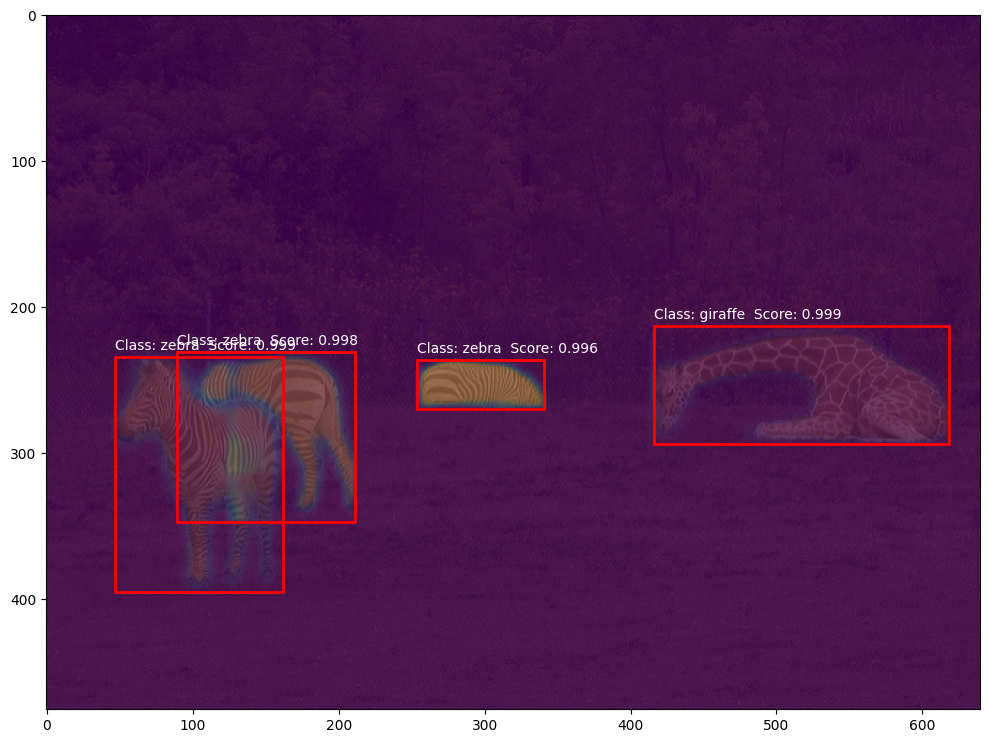

In [54]:
visualize_predictions('jungle.jpg', predictions)